In [1]:
# Standard Library Imports
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

from collections import Counter
%matplotlib inline

In [2]:
# Read the Dataset

event=pd.read_csv('event_transactions_CB.csv')

In [3]:
event.head(5)

,event_id,attendee_id,order_id,purchase_quad,purchase_type,spend_cat,age_cat,gender_cat,attendee_frequency,attendee_zip,Latitude,Longitude
0,1,342606,3786,2,2,0,3,0,1,7430,41.077102,-74.16147
1,1,342606,3786,2,2,1,3,1,1,80249,39.793686,-104.73913
2,1,342606,3786,3,2,0,3,0,1,30517,34.121974,-83.78604
3,1,342606,3786,3,2,1,3,1,1,8558,40.410155,-74.70726
4,1,342606,3786,4,0,0,3,0,1,54171,44.718335,-88.10117


In [4]:
event.tail(10)

,event_id,attendee_id,order_id,purchase_quad,purchase_type,spend_cat,age_cat,gender_cat,attendee_frequency,attendee_zip,Latitude,Longitude
4955021,9,5785,16796,1,1,0,0,0,2,34745,27.995287,-81.259332
4955022,9,5785,16796,1,1,2,0,1,2,93437,34.734890,-120.534670
4955023,9,5785,16796,1,1,2,0,0,2,14111,42.593148,-78.914980
4955024,9,222233,9602,2,1,1,2,1,0,15928,40.237410,-78.929780
4955025,9,302942,7106,3,1,2,2,1,1,32139,29.385225,-81.610520
4955026,9,302942,7106,3,1,1,2,0,1,92401,34.105079,-117.290750
4955027,9,302942,7106,3,1,2,2,1,1,80962,38.824690,-104.562027
4955028,9,382522,7677,1,1,1,3,0,1,61279,41.316530,-90.706710
4955029,9,382522,7677,1,1,2,3,1,1,80131,39.347863,-104.994708
4955030,9,382522,7677,1,1,1,3,0,1,7005,40.912798,-74.415160


In [5]:
event.describe()

,event_id,attendee_id,order_id,purchase_quad,purchase_type,spend_cat,age_cat,gender_cat,attendee_frequency,attendee_zip,Latitude,Longitude
count,4.955031e+06,4.955031e+06,4.955031e+06,4.955031e+06,4.955031e+06,4.955031e+06,4.955031e+06,4.955031e+06,4.955031e+06,4.955031e+06,4.955031e+06,4.955031e+06
mean,3.644858e+01,1.108229e+05,2.377718e+04,2.489094e+00,7.304608e-01,1.006893e+00,7.244806e-01,4.969301e-01,1.238398e+00,5.164662e+04,3.847151e+01,-9.235384e+01
std,1.239424e+01,1.346404e+05,1.975267e+04,8.085041e-01,6.928595e-01,8.152101e-01,1.129551e+00,4.999906e-01,7.429507e-01,3.158281e+04,5.641090e+00,1.608571e+01
min,1.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.001000e+03,2.472339e+01,-1.243589e+02
25%,2.800000e+01,1.930500e+04,7.227000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.844700e+04,3.378659e+01,-1.047118e+02
50%,3.700000e+01,3.739900e+04,1.992000e+04,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.412700e+04,4.000181e+01,-8.816205e+01
75%,4.700000e+01,2.089880e+05,3.523100e+04,3.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,8.030200e+04,4.210538e+01,-7.947800e+01
max,5.400000e+01,4.138390e+05,9.999900e+04,4.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,2.000000e+00,9.953600e+04,4.897130e+01,-7.218564e+01


In [6]:
# Check for null values
print(event.isnull().sum())

event_id              0
attendee_id           0
order_id              0
purchase_quad         0
purchase_type         0
spend_cat             0
age_cat               0
gender_cat            0
attendee_frequency    0
attendee_zip          0
Latitude              0
Longitude             0
dtype: int64


In [7]:
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955031 entries, 0 to 4955030
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   event_id            int64  
 1   attendee_id         int64  
 2   order_id            int64  
 3   purchase_quad       int64  
 4   purchase_type       int64  
 5   spend_cat           int64  
 6   age_cat             int64  
 7   gender_cat          int64  
 8   attendee_frequency  int64  
 9   attendee_zip        int64  
 10  Latitude            float64
 11  Longitude           float64
dtypes: float64(2), int64(10)
memory usage: 453.6 MB


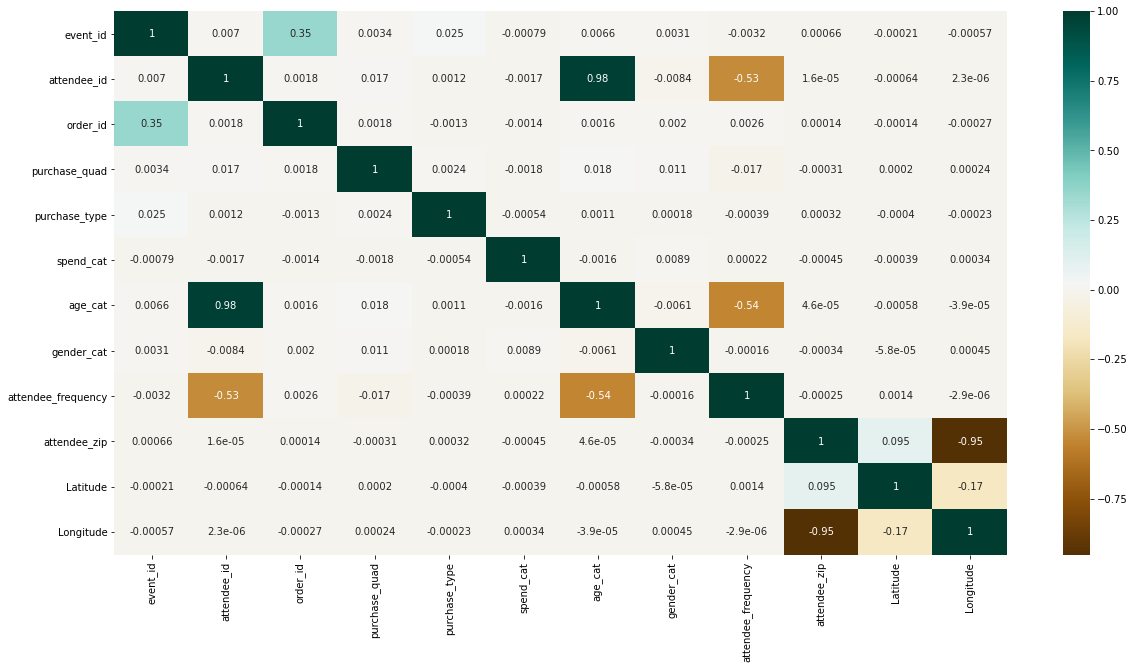

In [8]:
# Correlations
plt.figure(figsize=(20,10))
c=event.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

C:\Users\Yasmin\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age')

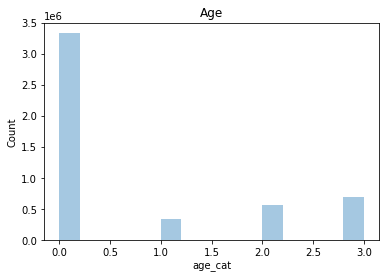

In [9]:
# Which age group are the major attendees
sns.distplot(event['age_cat'], bins=15, kde=False)
plt.ylabel('Count')
plt.title('Age')

People aged less than 21 are the major attendees.

Text(0.5, 1.0, 'Gender VS Attendee Frequency')

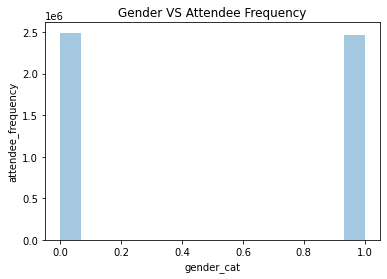

In [10]:
# Does gender affect Attendee Frequency
sns.distplot(event['gender_cat'], bins=15, kde=False)
plt.ylabel('purchase_type')
plt.title('Gender VS Purchase Type')

There is no gender bias in Purchase Type.

C:\Users\Yasmin\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Yasmin\Anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


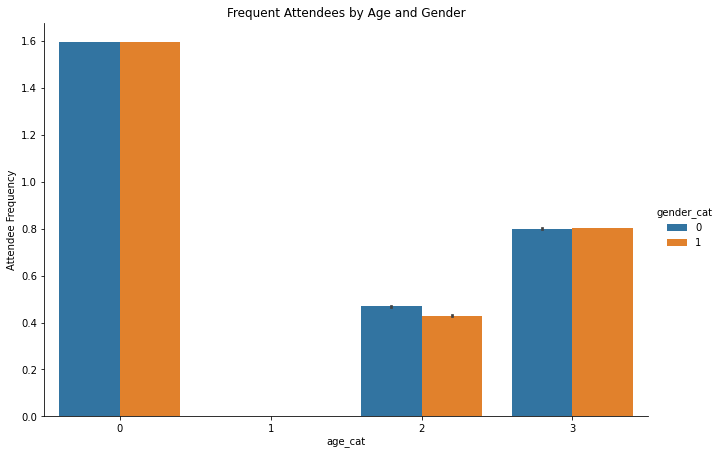

In [11]:
# How does Age and Gender affect Attendee Frequency
ax = sns.factorplot(x="age_cat", y="attendee_frequency", hue="gender_cat", data=event, 
                    kind="bar",aspect=1.5, size=6)
ax.set(ylabel='Attendee Frequency')
plt.title('Frequent Attendees by Age and Gender');

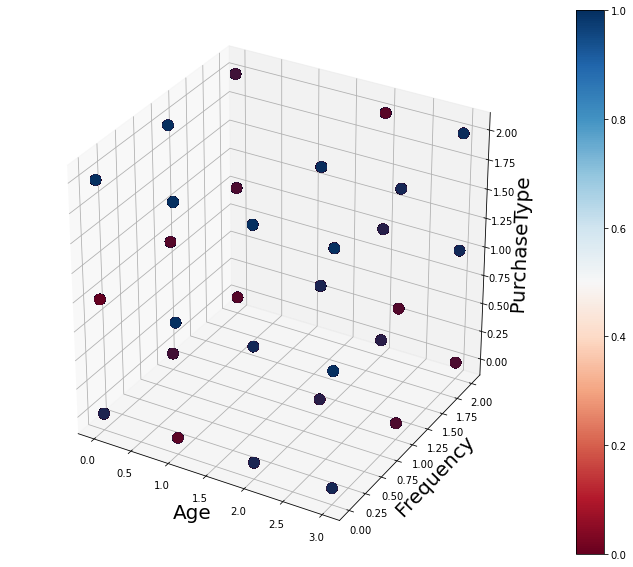

In [16]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pylab 

fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(111, projection='3d')


x = event['age_cat']
y = event['attendee_frequency']
z = event['purchase_type']
c = event['gender_cat']


cb1=ax.scatter(x, y, z, c=c, cmap=plt.cm.get_cmap('RdBu'),s=100)
plt.colorbar(cb1, ax=ax)
ax.set_xlabel('Age',fontsize=20)
ax.set_ylabel('Frequency',fontsize=20)
ax.set_zlabel('PurchaseType',fontsize=20)


plt.show()
